In [2]:
#@title LIBRERIAS
import cv2
import os
import seaborn as sns
sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image


In [ ]:
#@title CARGAR DATASET { display-mode: "form" }
from google.colab import drive
drive.mount('/content/drive')
acceso_directo =""#@param {type:"string"}
ruta='drive/MyDrive'+acceso_directo+'/IA'
files_list_A = ruta+'/Todas/A'
files_names= os.listdir(files_list_A)
files_list_dataset_2 = ruta+'/dataset/Entrenamiento'
folder_path = ruta+'/dataset/Entrenamiento/JUEVES'
img1 = cv2.imread(ruta+'/Todas/A/A37.jpg',0)

MessageError: Error: credential propagation was unsuccessful

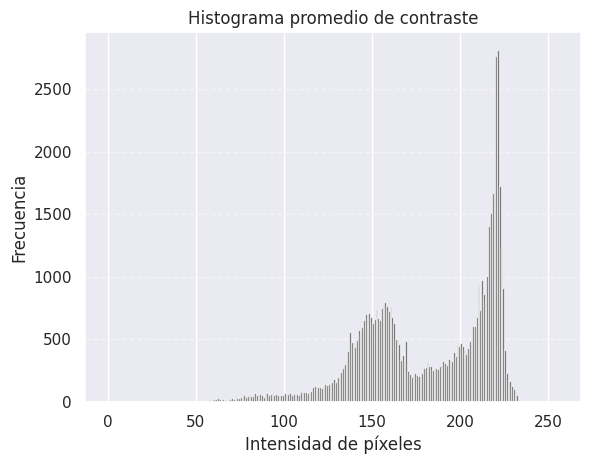

In [ ]:
plt.hist(img1.ravel(),256,[0,256],color='BLACK', alpha=0.7)
plt.title("Histograma promedio de contraste")
plt.xlabel("Intensidad de píxeles")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
contador_imagenes = 0
for file_name in files_names:
  image_path = os.path.join(files_list_A, file_name)
  if file_name.endswith(".jpg") or file_name.endswith(".png"):
      image = Image.open(image_path)
      #display(image)
      contador_imagenes += 1

print(f"Se muestran {contador_imagenes} imágenes en total.")

Se muestran 251 imágenes en total.


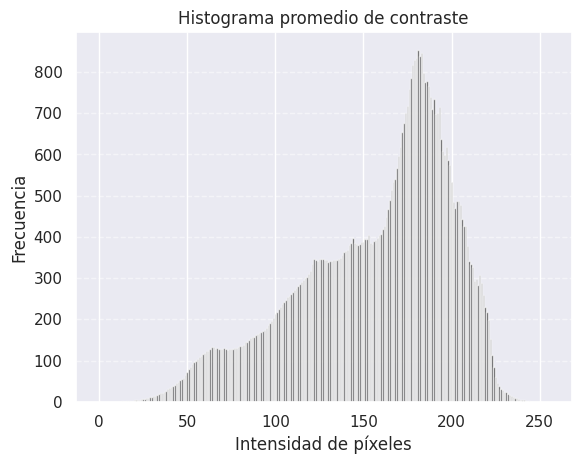

In [ ]:
histograms = []  # Lista para almacenar los histogramas

for file_name in files_names:
    image_path = os.path.join(files_list_A, file_name)
    if file_name.endswith(".jpg") or file_name.endswith(".png"):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Cargar la imagen en escala de grises
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])  # Calcular el histograma
        histograms.append(hist)

average_hist = np.mean(histograms, axis=0)

plt.bar(range(256), average_hist[:, 0], color='BLACK', alpha=0.7)
plt.title("Histograma promedio de contraste")
plt.xlabel("Intensidad de píxeles")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


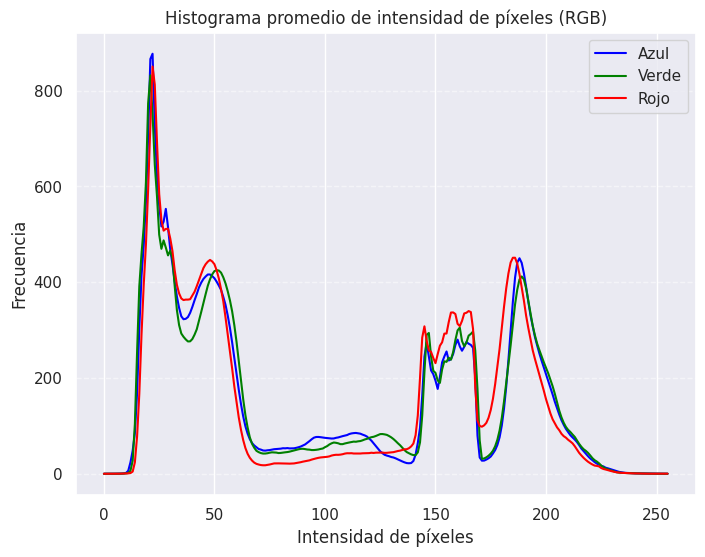

In [ ]:
files_names = os.listdir(folder_path)

# Inicializar una lista para almacenar los histogramas
histograms = []

# Calcular los histogramas para cada imagen
for file_name in files_names:
    image_path = os.path.join(folder_path, file_name)
    if file_name.lower().endswith((".jpg", ".png")):
        image = cv2.imread(image_path)  # Cargar la imagen a color
        hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])  # Canal azul
        hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])  # Canal verde
        hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])  # Canal rojo
        histograms.append([hist_b, hist_g, hist_r])

# Calcular el histograma promedio
average_hist_b = np.mean([hist[0] for hist in histograms], axis=0)
average_hist_g = np.mean([hist[1] for hist in histograms], axis=0)
average_hist_r = np.mean([hist[2] for hist in histograms], axis=0)

# Graficar el histograma promedio en forma de línea
plt.figure(figsize=(8, 6))
plt.plot(range(256), average_hist_b[:, 0], color='blue', label='Azul')
plt.plot(range(256), average_hist_g[:, 0], color='green', label='Verde')
plt.plot(range(256), average_hist_r[:, 0], color='red', label='Rojo')
plt.title("Histograma promedio de intensidad de píxeles (RGB)")
plt.xlabel("Intensidad de píxeles")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
#@title HISTOGRAMA DE LAS IMAGENES
files_list_A = ruta+'/Todas/A/A1.jpg'

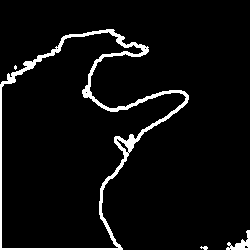

In [ ]:
#@title CONTORNO DE MANOS
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Cargar la imagen
image = cv2.imread(ruta+'/Todas/C/C1.jpg')

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Encontrar contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos en una imagen en blanco
contour_image = np.zeros_like(gray)
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)

# Mostrar la imagen con los contornos
cv2_imshow(contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

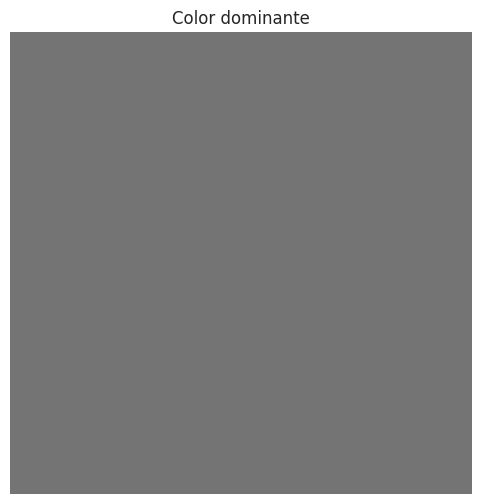

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Cargar la imagen
image = cv2.imread(ruta+'/Todas/C/C1.jpg')

# Convertir la imagen de BGR a RGB
imagen_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Obtener los valores medios de cada canal de color
media_color = np.mean(image, axis=(0, 1))

# Convertir los valores medios a tipo entero
media_color_int = media_color.astype(int)

# Mostrar el color dominante
plt.figure(figsize=(6, 6))
plt.imshow([[[media_color_int[2]/255, media_color_int[1]/255, media_color_int[0]/255]]])
plt.title('Color dominante')
plt.axis('off')
plt.show()


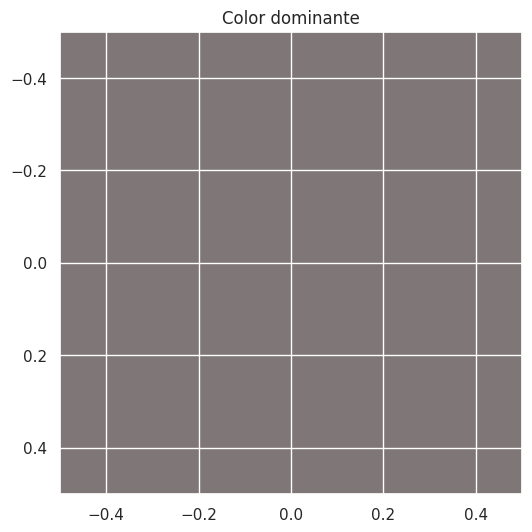

In [ ]:
# Cargar la imagen
image = cv2.imread(ruta+'/dataset/Validacion/AGOSTO/dedos_23.jpg')

# Convertir la imagen de BGR a RGB
#imagen_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Obtener los valores medios de cada canal de color
media_color = np.mean(image, axis=(0, 1))

# Convertir los valores medios a tipo entero
media_color_int = media_color.astype(int)

# Mostrar el color dominante
plt.figure(figsize=(6, 6))
plt.imshow([[[media_color_int[2]/255, media_color_int[1]/255, media_color_int[0]/255]]])
plt.title('Color dominante')
plt.axis('on')
plt.show()


**QUE SABEMOS DEL DATASET**

> Para COLOMBIAN SIGN LANGUAJE (LSC)

*   En total existen 5439 imagenes en el dataset en escala de grises.
*   El rango de imagenes esta entre 174(H) , 282(R).
*   El dataset no cuenta con las 27 letras del alfabeto (g,j,ñ,s,z).

> Para LSC-CONJUNTO DE DATOS SECTOR HOTELERO

*   Cuenta con 39 palabras diferentes cada una de ellas cuenta con 1000 imagenes rgb para la parte de entrenamiento del modelo.
*   Para la parte de validacion del modelo cuenta con 50 imagenes cada palabra.










